**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 8**
Regresión Lineal

---

*   NOMBRE: Clara Janet Rivera Medina
*   MATRÍCULA: A01173512

*   NOMBRE: Mario Alberto Guillen De La Torre
*   MATRÍCULA: A01796701

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# import os
# DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 8/Actividad8_RLineal"
# os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [4]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **Parte 1**. EDA

Efectúa una exploración inicial de los datos a través de:

1a) Estadísticas descriptivas para todas las variables del dataframe.

In [5]:
insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [6]:
insurance_df.describe(include='object').T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


1b) Búsqueda de valores faltantes.

- No hay valores faltantes

In [7]:
insurance_df.isnull().mean()*100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [8]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


1c) Histrogramas y boxplots para las variables cuantitativas y diagramas de barras con la frecuencia para las variables categóricas.

In [9]:
numerical_columns = insurance_df.select_dtypes(include=np.number).columns
categorical_columns = insurance_df.select_dtypes(exclude=np.number).columns

print(f"Categorical variables: {categorical_columns}")
print(f"Numerical variables: {numerical_columns}")

Categorical variables: Index(['sex', 'smoker', 'region'], dtype='object')
Numerical variables: Index(['age', 'bmi', 'children', 'charges'], dtype='object')


In [10]:
def create_histogram(data, columns):
    num_plots = len(columns)
    num_rows = math.ceil(num_plots / 2)
    fig, axes = plt.subplots(num_rows, 2, figsize=(7 * num_rows, 10))
    axes = axes.ravel()

    for column, ax in zip(columns, axes):
        sns.histplot(data=data, ax=ax, x=column, kde=True)
        ax.set(title=column, xlabel=None)

    plt.tight_layout()

def create_boxplot(data, quantitative_columns):
    num_plots = len(quantitative_columns)
    num_rows = math.ceil(num_plots / 2)
    fig, axes = plt.subplots(num_rows, 2, figsize=(7 * num_rows, 10))
    axes = axes.ravel()

    for column, ax in zip(quantitative_columns, axes):
        sns.boxplot(data=data, ax=ax, y=column)
        ax.set(title=column, xlabel=None)

    plt.tight_layout()

def create_barplot(data, columns):
    num_plots = len(columns)
    num_rows = math.ceil(num_plots / 2)
    fig, axes = plt.subplots(num_rows, 2, figsize=(7 * num_rows, 10))
    axes = axes.ravel()

    for ax in axes[len(columns):]:  # Hide any unused axes
        ax.set_visible(False)

    for column, ax in zip(columns, axes):
        sns.countplot(data=data, ax=ax, x=column)
        ax.set(title=column, xlabel=None)

    plt.tight_layout()

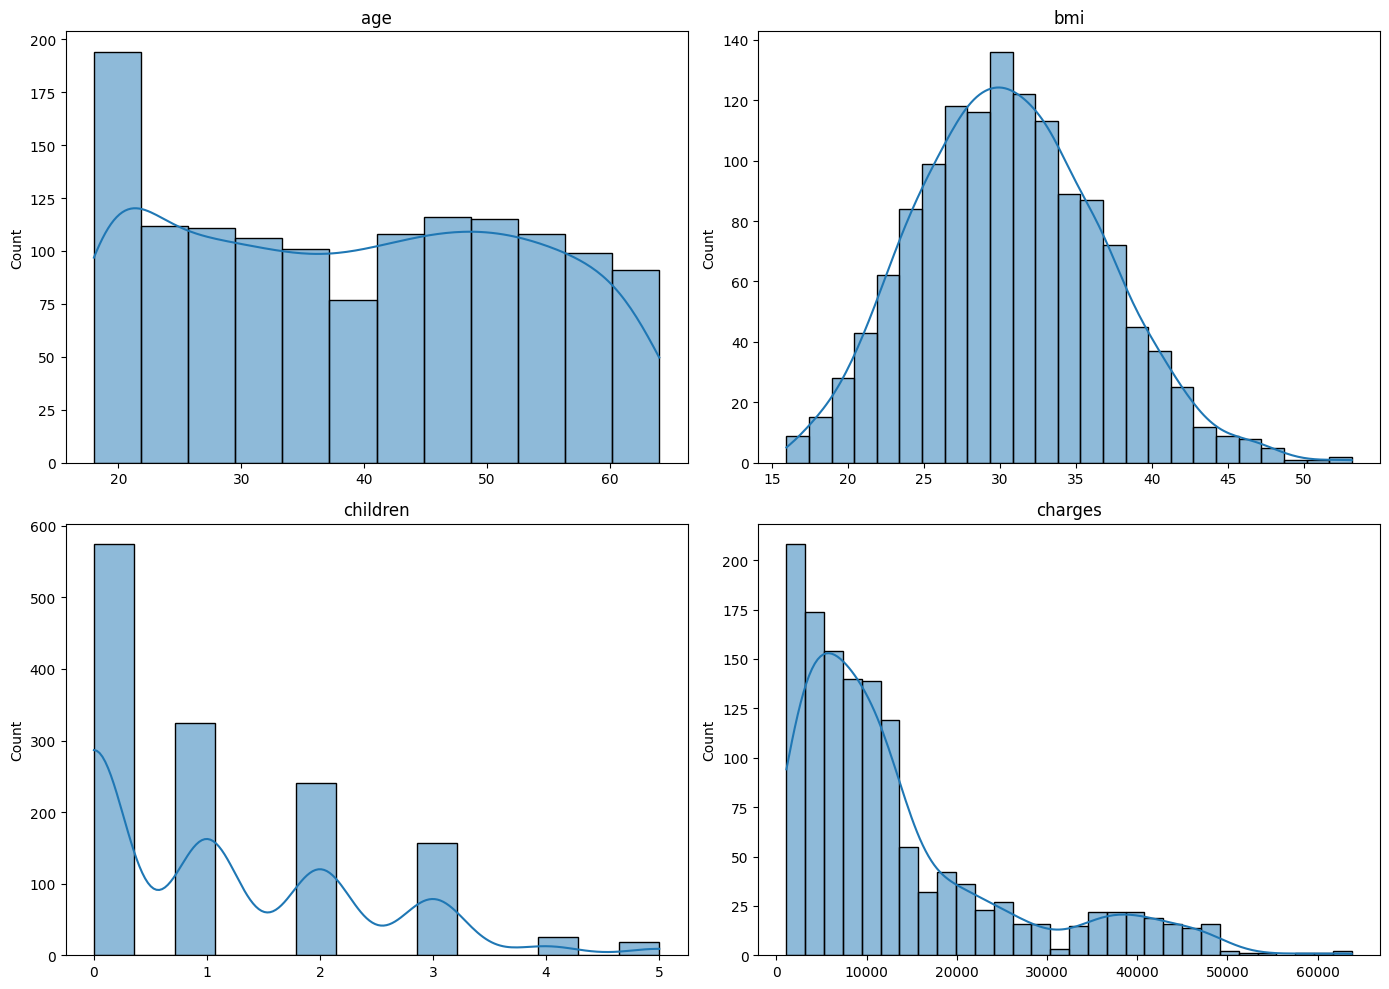

In [11]:
create_histogram(insurance_df, numerical_columns)

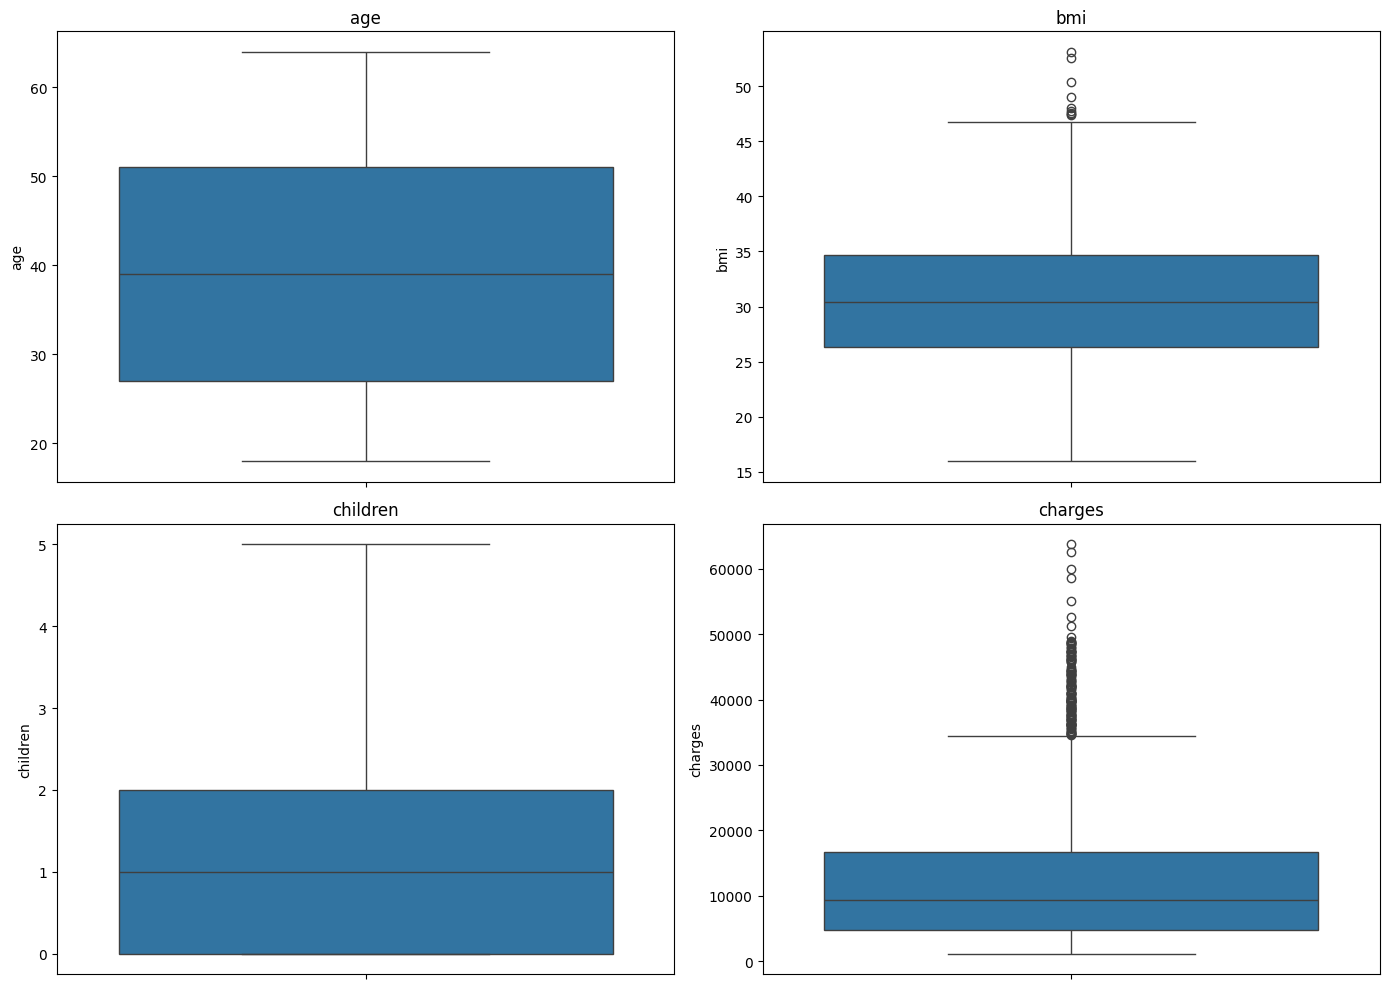

In [12]:
create_boxplot(insurance_df, numerical_columns)

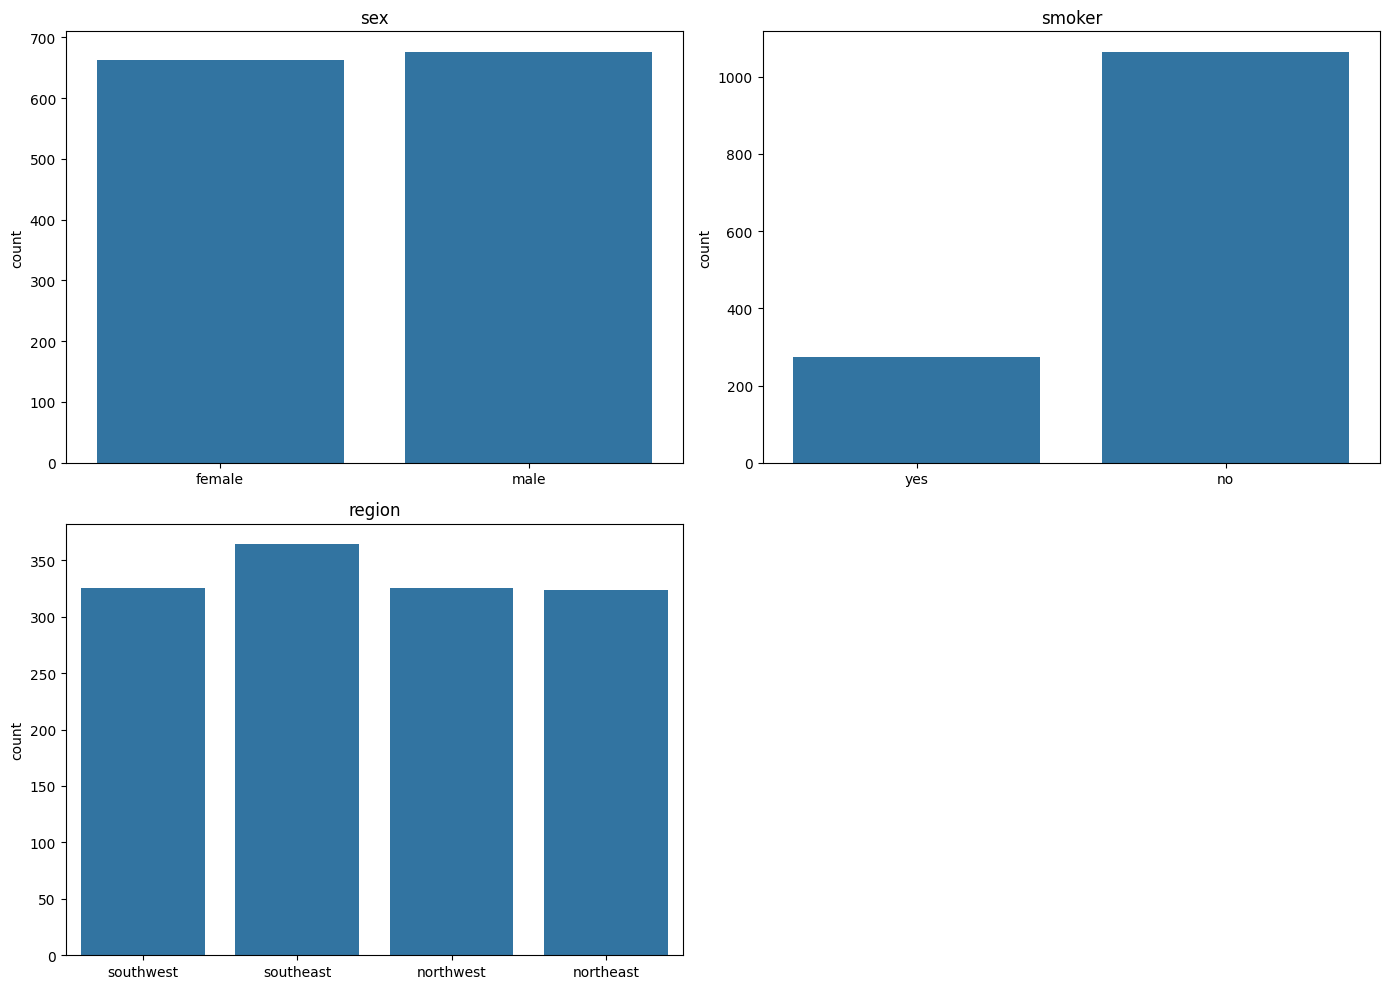

In [13]:
create_barplot(insurance_df, categorical_columns)

Para responder los siguientes cuestionamientos, genera los gráficos indicados:

2a) ¿Hay diferencias significativas de las primas según el sexo? Compara la distribución de la variable `charges` por medio de un boxplot.

- No parece haber diferencias significativas en las primas según el sexo. Las distribuciones muestran similitudes por ejempplo en la mediana, aunque el tercer cuartil es un poco mayor para los hombres pero ello no es suficiente para decir que hay una diferencia significativa.

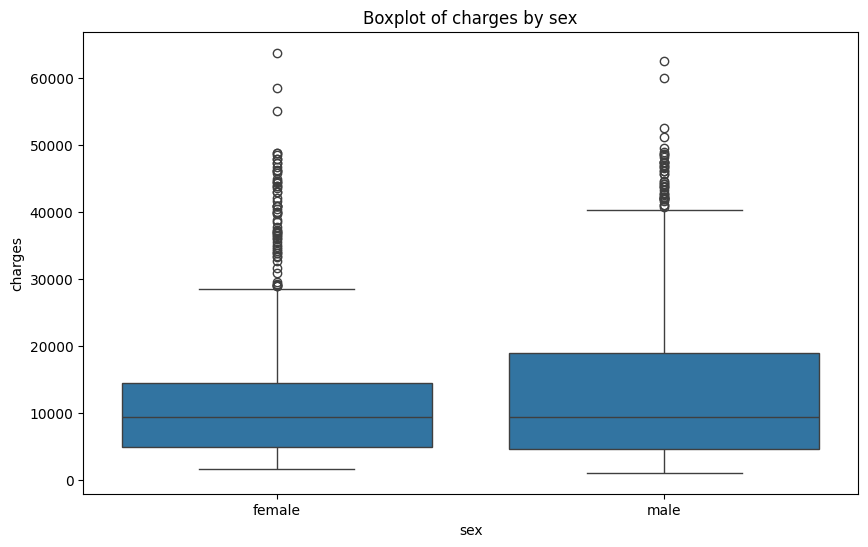

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='charges', data=insurance_df)
plt.title(f'Boxplot of charges by sex')
plt.show()

2b) Crea un diagrama de dispersión de `charges` versus el `bmi` que incorpore la distinción por las categorías `smoker` y `children` (tip: utiliza el parámetro `size`) ¿Hay alguna conclusión importante que se derive del gráfico?

- Sí, las personas fumadoras tienden a tener una prima de seguro más alta en comparación con las no fumadoras. Especialmente con un mayor Indice de Masa Corporal (BMI).
- El número de hijos no parece tener un impacto significativo en las primas de seguro, se observa variabilidad dentro de cada categoría.

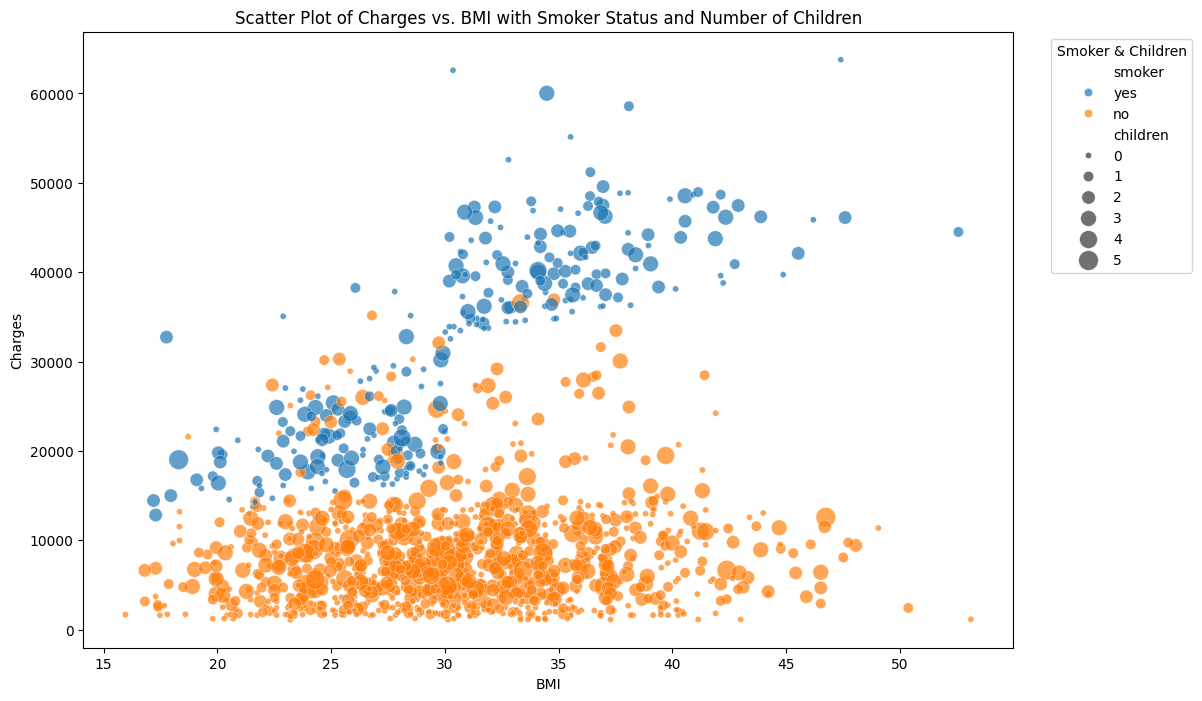

In [15]:
plt.figure(figsize=(12, 8))

sns.scatterplot(data=insurance_df, x='bmi', y='charges', hue='smoker', size='children', sizes=(20, 200), alpha=0.7)

plt.title('Scatter Plot of Charges vs. BMI with Smoker Status and Number of Children')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker & Children', loc='upper right', bbox_to_anchor=(1.20, 1))
plt.show()

2c) Elabora un mapa de calor que muestre la correlación de las variables numéricas.

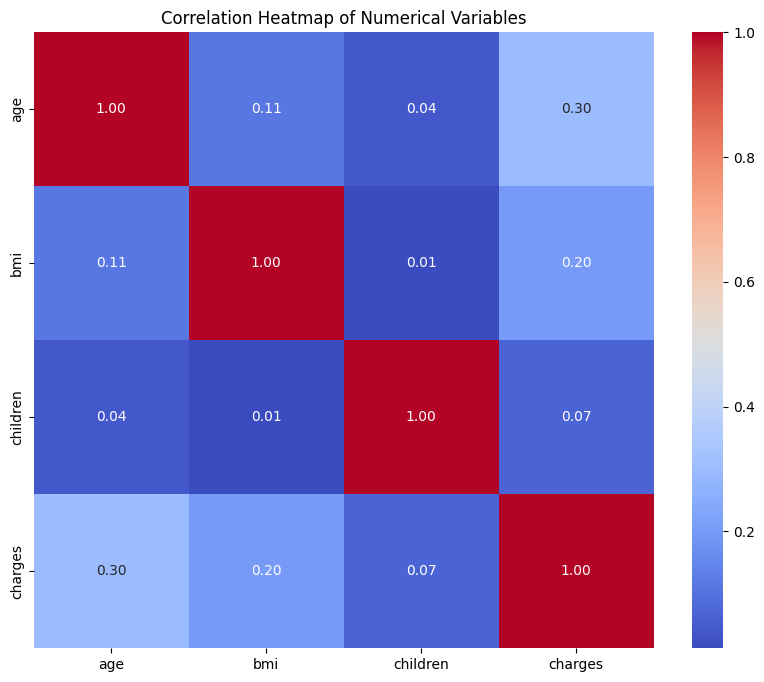

In [16]:
corr_matrix = insurance_df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

Obtén un dataframe con las observaciones que tengan valores atípicos en `charges`.

3a) ¿Cuál es el promedio de `age` y de `bmi` en el dataframe de valores atípicos obtenido?
- Promedio de `age`: 41.08
- Promedio de `bmi`: 35.56

In [17]:
def get_IQR_outliers(df, column_name):
    percentile_25 = df[column_name].quantile(0.25)
    percentile_75 = df[column_name].quantile(0.75)
    iqr = percentile_75 - percentile_25
    upper_limit = percentile_75 + 1.5 * iqr
    lower_limit = percentile_25 - 1.5 * iqr
    IQR_outliers = df[(df[column_name] < lower_limit) | (df[column_name] > upper_limit)]
    return IQR_outliers

In [18]:
charges_outliers_df = get_IQR_outliers(insurance_df, 'charges')
charges_outliers_df

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


In [19]:
outliers_age_mean = charges_outliers_df['age'].mean()
outliers_bmi_mean = charges_outliers_df['bmi'].mean()

print(f"Age mean in charge outliers: {outliers_age_mean:.2f}")
print(f"BMI mean in charge outliers: {outliers_bmi_mean:.2f}")

Age mean in charge outliers: 41.08
BMI mean in charge outliers: 35.56


3b) ¿Qué porcentaje de estas observaciones (en el dataframe de valores atípicos obtenidos) se corresponden a mujeres y a hombres? ¿A fumadores y no fumadores?

- Genero:
    - Mujeres: 64.03%
    - Hombres: 35.97%
- Fumadores:
    - Fumadores: 97.84%
    - No fumadores: 2.16%

In [20]:
outliers_gender_percentages = charges_outliers_df['sex'].value_counts(normalize=True) * 100
print(outliers_gender_percentages)

sex
male      64.028777
female    35.971223
Name: proportion, dtype: float64


In [21]:
outliers_smoke_percentages = charges_outliers_df['smoker'].value_counts(normalize=True) * 100
outliers_smoke_percentages

smoker
yes    97.841727
no      2.158273
Name: proportion, dtype: float64

# **Parte 2**. Preprocesamiento

4. Separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`charges`).

In [22]:
y = insurance_df['charges']
X = insurance_df.drop('charges', axis=1)

5. Divide el conjunto en entrenamiento y prueba (80:20) considerando:


*   El parámetro `random_state` con el valor de 1 para garantizar reproducibilidad.
*   Analiza los diagramas de barras obtenidos en el ejercicio 1c. Con los resultados observados, es conveniente usar la variable `smoker` en la estrategia de estratificación.
*   Como ya tienes separadas en `X` e `y` los predictores y salida, consulta cómo ejecutar la función `train_test_split()` para obtener `Xtrain, Xtest, ytrain, ytest` en una única instrucción.

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,
    random_state=1,
    stratify=X['smoker']
)

6. Prepara un transformador, denominado `preprocessing`, para aplicar escalamiento *MinMax* a los predictores numéricos y codificación *one-hot* a los categóricas.

In [24]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


preprocessing_num = numerical_columns.to_list()
preprocessing_num.remove("charges")

preprocessing = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), preprocessing_num),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)

# **Parte 3**. Entrenando y evaluando el modelo de RL

7. Ejecuta un pipeline con el transformador creado y el algoritmo de regresión lineal para entrenar un modelo denominado `lr_model`.

Evalúa el modelo en el conjunto de prueba y obtén la raíz del error cuadrático medio (`RMSE`) y la métrica `R` cuadrado ($R^2$). Aunque ésta última la estudiarás a detalle la próxima semana, ahora sólo debes saber que toma valores entre 0 y 1, donde 1 indica un ajuste perfecto y, por tanto, un modelo muy fiable para las previsiones futuras. La función de scikit-learn que determina esta métrica es: [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

lr_model = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('regressor', LinearRegression())
])

lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)


rmse = root_mean_squared_error(y_test, y_pred)
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2:.2f}')

Root Mean Squared Error (RMSE): 5701.99
R^2 Score: 0.75


**Valora el rendimiento del modelo con los siguientes cambios:**


8. Reemplaza los outliers de `charges` con el límite superior (`Q3 + 1.5 * IQR`). Haz el cambio en ambos conjuntos: `ytrain` y `ytest`, previo a la aplicación del mismo pipeline. Guarda el modelo como `lr_model2`.


In [28]:
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR

y_train.loc[y_train > upper_limit] = upper_limit
y_test.loc[y_test > upper_limit] = upper_limit

In [29]:
lr_model2 = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('regressor', LinearRegression())
])

lr_model2.fit(X_train, y_train)
y_pred = lr_model2.predict(X_test)


rmse = root_mean_squared_error(y_test, y_pred)
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2:.2f}')

Root Mean Squared Error (RMSE): 4814.45
R^2 Score: 0.76


9. Prepara otro transformador, denominado `preprocessing2`, para aplicar escalamiento estándar a los predictores numéricos y codificación ordinal a los categóricas. Aplícalo en un nuevo pipeline utilizando nuevamente regresión lineal. Guarda el modelo como `lr_model3`.

**Nota.** Los cambios se ejecutan de manera consecutiva, por ejemplo: el reemplazo de los outliers también se ejecuta previo al transformador `preprocessing2` y así sucesivamente.

In [30]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder



preprocessing2 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), preprocessing_num),
        ('cat', OrdinalEncoder(), categorical_columns)
    ]
)

lr_model3 = Pipeline(steps=[
    ('preprocessing', preprocessing2),
    ('regressor', LinearRegression())
])


lr_model3.fit(X_train, y_train)

y_pred3 = lr_model3.predict(X_test)

rmse3 = np.sqrt(np.mean((y_test - y_pred3) ** 2))
print(f'Root Mean Squared Error (RMSE) for lr_model3: {rmse3:.2f}')

r2_3 = r2_score(y_test, y_pred3)
print(f'R^2 Score for lr_model3: {r2_3:.2f}')


Root Mean Squared Error (RMSE) for lr_model3: 4811.60
R^2 Score for lr_model3: 0.76


10. Utiliza regresión polinomial para verificar si se produce un mejor ajuste. Intenta con varios grados, aunque debes dejar en el código sólo el de mejor rendimiento. Guarda el modelo como `lr_model4`.

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

best_rmse = float('inf')
best_degree = 1

for degree in range(1, 5): 
    model = make_pipeline(
        preprocessing2,
        PolynomialFeatures(degree=degree, include_bias=False),
        LinearRegression()
    )

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    rmse = root_mean_squared_error(y_test, y_pred)
    print(f'Degree {degree}: RMSE = {rmse:.2f}')

    if rmse < best_rmse:
        best_rmse = rmse
        best_degree = degree

lr_model4 = make_pipeline(
    preprocessing2,  
    PolynomialFeatures(degree=best_degree, include_bias=False),
    LinearRegression()
)

lr_model4.fit(X_train, y_train)

y_pred4 = lr_model4.predict(X_test)
rmse4 = root_mean_squared_error(y_test, y_pred4)
r2_4 = r2_score(y_test, y_pred4)

print(f'Best Degree: {best_degree}')
print(f'Root Mean Squared Error (RMSE) for lr_model4: {rmse4:.2f}')
print(f'R^2 Score for lr_model4: {r2_4:.2f}')


Degree 1: RMSE = 4811.60
Degree 2: RMSE = 4285.57
Degree 3: RMSE = 4481.88
Degree 4: RMSE = 4822.16
Best Degree: 2
Root Mean Squared Error (RMSE) for lr_model4: 4285.57
R^2 Score for lr_model4: 0.81
